In [1]:
%matplotlib inline
import pandas_profiling
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 6]
import pandas
pandas.options.display.max_columns = 999
from datetime import datetime

/Users/cruz/dev/android_test_inspector/exploratory_analysis/venv/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
now = pandas.Timestamp(datetime.now())

In [156]:
df_simple = pandas.read_csv("../results_with_coverage.csv", parse_dates=[0,10])
df_googleplay = pandas.read_csv("../googleplay.csv", index_col='package')
df = df_simple.join(df_googleplay, on="app_id")
len(df.github_link.unique())

982

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,32
Number of observations,1000
Total Missing (%),3.4%
Total size in memory,127.0 KiB
Average record size in memory,130.1 B
Numeric,15
Categorical,5
Date,2
Text (Unique),1
Rejected,9
Distinct count,2


In [5]:
df.dtypes


last_updated          datetime64[ns]
github_link                   object
user                          object
project_name                  object
app_id                        object
category                      object
stars                          int64
contributors                   int64
commits                        int64
forks                          int64
created_at            datetime64[ns]
androidviewclient               bool
appium                          bool
calabash                        bool
espresso                        bool
monkeyrunner                    bool
pythonuiautomator               bool
robotium                        bool
uiautomator                     bool
projectquantum                  bool
qmetry                          bool
saucelabs                       bool
firebase                        bool
perfecto                        bool
bitbar                          bool
junit                           bool
androidjunitrunner              bool
r

In [6]:
ui_automation_frameworks = [
    "androidviewclient",
    'appium',
    'calabash',
    'espresso',
    'monkeyrunner',
    'pythonuiautomator',
    'robotium',
    'uiautomator',
]

cloud_test_services = [
    'projectquantum',
    'qmetry',
    'saucelabs',
    'firebase',
    'perfecto',
    'bitbar',
]

unit_test_frameworks = [
    'junit',
    'androidjunitrunner',
    'roboelectric',
    'robospock',
]

# Projects with tests

In [7]:
df['tests'] = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].any(axis=1)
projects_with_tests = df['tests'].sum()
total_projects = len(df.index)
print("{} out of {} projects ({:.0%}).".format(projects_with_tests, total_projects, projects_with_tests/total_projects))

406 out of 1000 projects (41%).


# Projects with unit tests

In [8]:
projects_with_unit_tests = df[unit_test_frameworks].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_unit_tests, total_projects, projects_with_tests/total_projects))

392 out of 1000 projects (41%).


# Projects using UI tests

In [9]:
df['ui_tests'] = df[ui_automation_frameworks].apply(any, axis=1)
projects_with_ui_tests = df['ui_tests'].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_ui_tests, total_projects, projects_with_ui_tests/total_projects))


154 out of 1000 projects (15%).


# Projects using cloud test services

In [10]:
df["cloud_tests"] = df[cloud_test_services].apply(any, axis=1)
projects_with_cloud_tests = df["cloud_tests"].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_cloud_tests, total_projects, projects_with_cloud_tests/total_projects))


29 out of 1000 projects (3%).


# Number of projects by framework

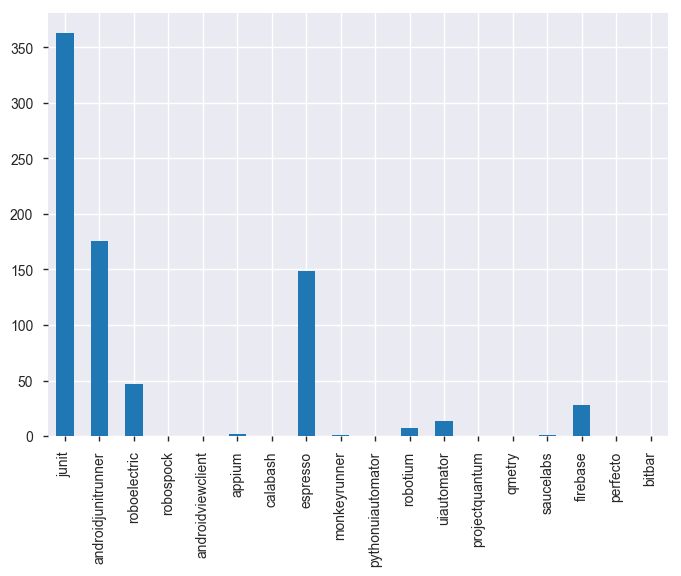

In [15]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# pie = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='pie', ax=ax1)
bar = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='bar')

In [16]:
df[df['firebase']]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
24,2017-08-23,https://github.com/nextcloud/android,nextcloud,android,com.nextcloud.android.beta,Internet,388,70,8589,204,2016-06-06,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,True,False,False,NaN,NaN,NaN,True,True,True
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.353432,14396.0,"100,000 - 500,000",True,False,True
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.593291,477.0,"10,000 - 50,000",True,False,True
113,2017-08-07,https://github.com/Vavassor/Tusky,Vavassor,Tusky,com.keylesspalace.tusky,Internet,262,35,779,68,2017-01-02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,3.645022,462.0,"50,000 - 100,000",True,True,True
119,2017-08-02,https://github.com/ligi/SurvivalManual,ligi,SurvivalManual,org.ligi.survivalmanual,Reading,241,3,277,42,2016-09-16,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.691781,10804.0,"1,000,000 - 5,000,000",True,True,True
158,2017-07-18,https://github.com/walleth/walleth,walleth,walleth,org.walleth,Money,67,5,283,15,2017-05-01,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,4.090909,11.0,"1,000 - 5,000",True,True,True
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True
180,2017-07-14,https://github.com/ligi/MaterialTeaTimer,ligi,MaterialTeaTimer,org.ligi.materialteatimer,Time,11,3,84,9,2016-10-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.187500,16.0,"1,000 - 5,000",True,False,True
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.543933,239.0,"10,000 - 50,000",True,False,True
214,2017-06-28,https://github.com/bottiger/SoundWaves,bottiger,SoundWaves,org.bottiger.podcast,Multimedia,93,6,2291,9,2012-07-18,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.159091,88.0,"10,000 - 50,000",True,True,True


------
## Conjecture
----

### Unit test
_JUnit_ is with no doubt the most used framework.
This can be explained by the fact that Google recommends _Junit_ for unit tests.

In addition, other Android testing tools developed by Google (e.g., Espresso, and UIAuomator) rely on _JUnit_ for the creation of tests.

AndroidJunitRunnner is also very popular, since it allows to run unit tests on the device.
This is the tool developed and recommended by Google and it is used not only for unit testing but also for other Google instrumentation frameworks.

### UI tests

Espresso is the clear winner.
The main reasons for this probably rely on the fact that Google Docs and Tutorials for Android tests first introduce Espresso. 
One strong feature of Espresso is the fact that it only manipulates and asserts on the application UI while it is at rest. This is very handy and makes the creation of tests a lot easier, since other frameworks require using wait and poll mechanisms.

### Cloud test services

Cloud test services are still very shy in the OSS world of Android apps. Only 3% (29 out of 1000) of apps use it.
Google Firebase is the most popular, followed by Saucelabs. None of the other frameworks are being used by the the apps in this study.

-----


In [17]:
df['age'] = (now - df['created_at'])
df['age_numeric'] = (now - df['created_at']).astype('<m8[Y]').astype('int')
df['time_since_last_update'] = (now - df['last_updated'])
df['time_since_last_update_numeric'] = df['time_since_last_update'].astype('<m8[Y]').astype('int')

# Distribution of Age

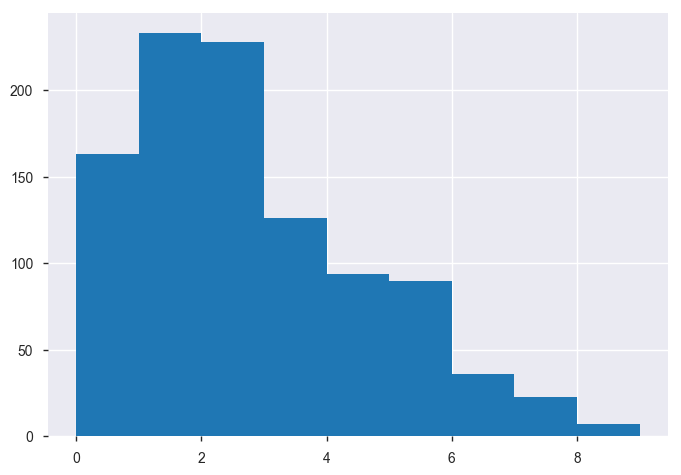

In [18]:
df['age_numeric'].hist(bins=9)

In [19]:
df['age'].describe()

count                         1000
mean     1031 days 17:00:20.091824
std       673 days 11:56:35.891598
min        30 days 16:41:36.891824
25%       527 days 10:41:36.891824
50%       900 days 16:41:36.891824
75%      1454 days 16:41:36.891824
max      3331 days 16:41:36.891824
Name: age, dtype: object

# Tests in projects by time since creation

In [20]:
def tests_in_projects_by_time_of_creation(df_projects, frameworks, label=None,
                                          title="Portion of projects with tests by age",
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['age_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['age_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['age_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(age_max), portions, label=label)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1')
    ax = plt.gca()
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        plt.title(title)

In [21]:
df[df['age_numeric']==df['age_numeric'].max()]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
921,2015-09-17,https://github.com/dbravender/korean_conjugation,dbravender,korean_conjugation,us.bravender.android.dongsa,Science & Education,43,2,572,15,2008-07-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.537445,454.0,"10,000 - 50,000",False,False,False,3331 days 16:41:36.891824,9,722 days 16:41:36.891824,1


Age 0:
107 out of 163 projects (65.6%).
Age 1:
135 out of 233 projects (57.9%).
Age 2:
57 out of 228 projects (25.0%).
Age 3:
33 out of 126 projects (26.2%).
Age 4:
29 out of 94 projects (30.9%).
Age 5:
30 out of 90 projects (33.3%).
Age 6:
10 out of 36 projects (27.8%).
Age 7:
4 out of 23 projects (17.4%).
Age 8:
1 out of 6 projects (16.7%).
Age 9:
0 out of 1 projects (0.0%).


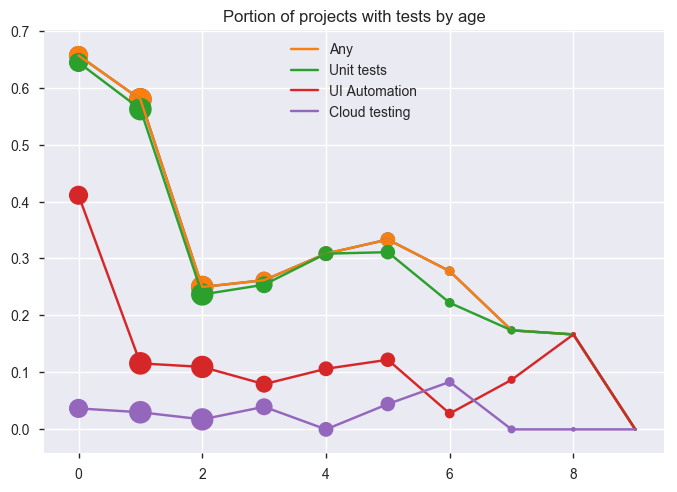

In [22]:
tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services,
                                      verbose=True)

tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_creation(df, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_creation(df, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_creation(df, cloud_test_services, label="Cloud testing")
plt.title("Portion of projects with tests by age")

------
## Conjecture
----

There is an increasing trend of test usage in Android apps.
Most ptojects with less than 2 years are using automated tests.
In addition UI automation has became popular in the last year.
Two considerations can be taken from this trend:

1. Test for Android apps are becoming more popular. Either because more tools are available or developers are more aware of the importance of using automated tests in their apps.

2. Projects have tests at the begining of the project, but as soons as they get more mature and complex, tests easily become obsolete and are difficult to maintain. Hence, tests tend to be removed from these projects.

This last conjecture is very unlikely, since one could expect that some of these tests are simple or cover a stable part of the app's core, and thus could be kept in the project. Anyhow, we further analyse this data by restinging it to projects that were created before 2 years ago.

Another conclusion from this visualization is that most projects that use UI automation also use unit test frameworks.

----

In [23]:
((df['age'].dt.total_seconds()/3600/24/365)<1).sum()

163

# Active projects

**Projects that had an update in the last year**

In [24]:
df_active = df[df['time_since_last_update'].dt.total_seconds()/(3600*24*365) < 1]
print("Total projects updated within last year: {}.".format(len(df_active.index)))


Total projects updated within last year: 671.


# Tests in projects by time since creation (only for active projects)

Only considered projects that had an update in the last year.

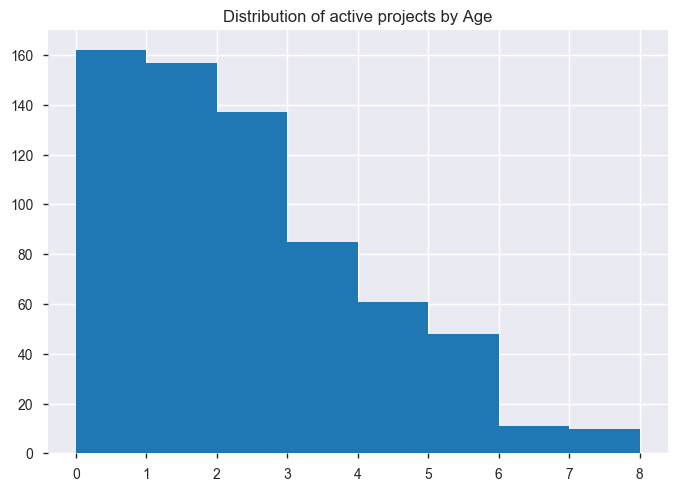

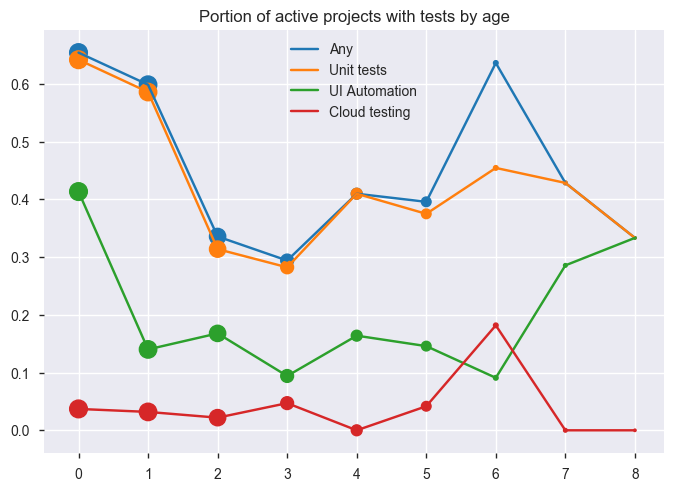

In [25]:
plt.title("Distribution of active projects by Age")
df_active.age_numeric.hist(bins=8)
# fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.figure()
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_creation(df_active, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_creation(df_active, cloud_test_services, label="Cloud testing")
plt.title("Portion of active projects with tests by age")

# Projects that use cloud testing services

In [152]:
df_cloud = df[df[cloud_test_services].any(axis='columns')]

In [153]:
print("Total projects using cloud services: {}".format(len(df_cloud)))

Total projects using cloud services: 29


In [154]:
df_cloud

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
24,2017-08-23,https://github.com/nextcloud/android,nextcloud,android,com.nextcloud.android.beta,Internet,388,70,8589,204,2016-06-06,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,True,False,False,NaN,NaN,NaN,True,True,True
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.353432,14396.0,"100,000 - 500,000",True,False,True
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.593291,477.0,"10,000 - 50,000",True,False,True
113,2017-08-07,https://github.com/Vavassor/Tusky,Vavassor,Tusky,com.keylesspalace.tusky,Internet,262,35,779,68,2017-01-02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,3.645022,462.0,"50,000 - 100,000",True,True,True
119,2017-08-02,https://github.com/ligi/SurvivalManual,ligi,SurvivalManual,org.ligi.survivalmanual,Reading,241,3,277,42,2016-09-16,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.691781,10804.0,"1,000,000 - 5,000,000",True,True,True
158,2017-07-18,https://github.com/walleth/walleth,walleth,walleth,org.walleth,Money,67,5,283,15,2017-05-01,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,4.090909,11.0,"1,000 - 5,000",True,True,True
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True
180,2017-07-14,https://github.com/ligi/MaterialTeaTimer,ligi,MaterialTeaTimer,org.ligi.materialteatimer,Time,11,3,84,9,2016-10-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.187500,16.0,"1,000 - 5,000",True,False,True
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.543933,239.0,"10,000 - 50,000",True,False,True
214,2017-06-28,https://github.com/bottiger/SoundWaves,bottiger,SoundWaves,org.bottiger.podcast,Multimedia,93,6,2291,9,2012-07-18,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.159091,88.0,"10,000 - 50,000",True,True,True


### Projects that use cloud services but no other test framework: 

In [28]:
df_cloud_wo_ui = df_cloud[ui_automation_frameworks+unit_test_frameworks].any(axis=1)==False
print("Total Projects: {}".format(df_cloud_wo_ui.sum()))
df_cloud[df_cloud_wo_ui]

Total Projects: 8


,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.353432,14396.0,"100,000 - 500,000",True,False,True,2428 days 16:41:36.891824,6,24 days 16:41:36.891824,0
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.593291,477.0,"10,000 - 50,000",True,False,True,631 days 16:41:36.891824,1,25 days 16:41:36.891824,0
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True,1310 days 16:41:36.891824,3,56 days 16:41:36.891824,0
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.543933,239.0,"10,000 - 50,000",True,False,True,1084 days 16:41:36.891824,2,61 days 16:41:36.891824,0
573,2016-11-21,https://github.com/khertan/ForRunners,khertan,ForRunners,net.khertan.forrunners,Sports & Health,38,5,182,19,2015-10-10,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,4.272727,22.0,"500 - 1,000",True,False,True,699 days 16:41:36.891824,1,291 days 16:41:36.891824,0
644,2016-10-04,https://github.com/ybonnel/TransportsRennes,ybonnel,TransportsRennes,fr.ybo.transportsbordeaux,Navigation,42,3,1291,15,2010-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.498146,1618.0,"50,000 - 100,000",True,False,True,2457 days 16:41:36.891824,6,339 days 16:41:36.891824,0
698,2016-08-06,https://github.com/M66B/NetGuard,M66B,NetGuard,eu.faircode.netguard,Security,1149,25,3012,271,2015-10-24,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.234281,5630.0,"500,000 - 1,000,000",True,False,True,685 days 16:41:36.891824,1,398 days 16:41:36.891824,1
718,2016-07-08,https://github.com/Andre1299/TUI-ConsoleLauncher,Andre1299,TUI-ConsoleLauncher,ohi.andre.consolelauncher,System,209,2,123,63,2016-05-11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.684715,6150.0,"100,000 - 500,000",True,False,True,485 days 16:41:36.891824,1,427 days 16:41:36.891824,1



# Projects that started 2 years ago by date time since last update

In [29]:
df_old = df[df['age_numeric']>=2]

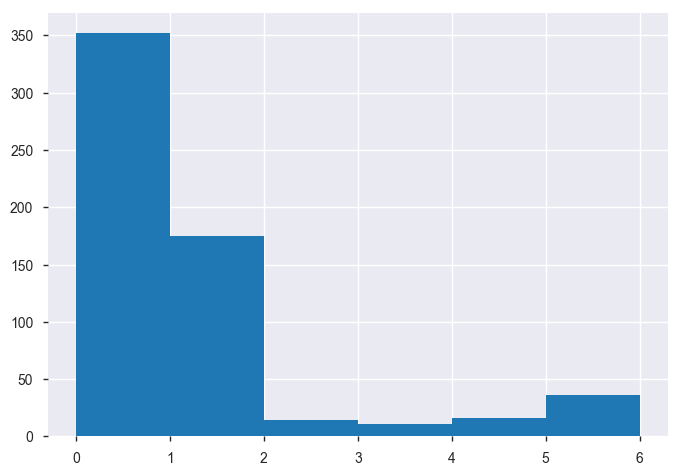

In [30]:
df_old['time_since_last_update_numeric'].hist(bins=6)

In [31]:
def tests_in_projects_by_time_of_update(df_projects, frameworks, label=None,
                                          title="Portion of projects with tests by time since last update",
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['time_since_last_update_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['time_since_last_update_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['time_since_last_update_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(age_max), portions, label=label)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1')
    ax = plt.gca()
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        plt.title(title)

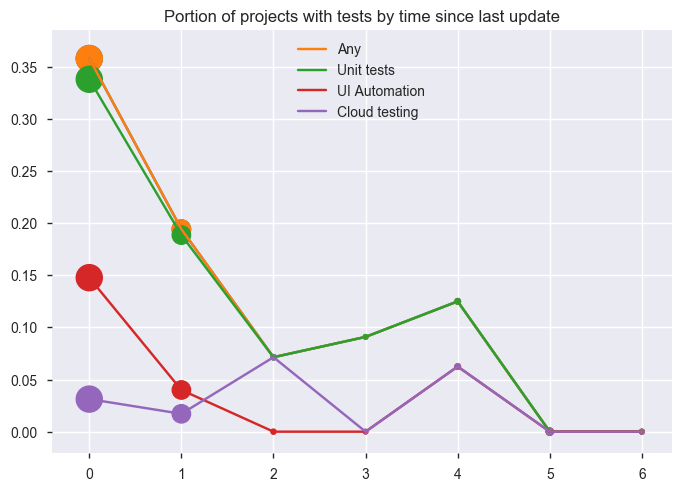

In [32]:
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks+ui_automation_frameworks+cloud_test_services)
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_update(df_old, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_update(df_old, cloud_test_services, label="Cloud testing")

------
## Conjecture
----

This visualization comprises only projects that are 2+ years old.
It shows an increase interest on having automated tests in the recent years. 

----

# Analysis of the impact of having tests in a project

In [33]:
df[['stars','forks']].describe()

,stars,forks
count,1000.000000,1000.000000
mean,145.281000,53.854000
std,608.915605,249.030032
min,0.000000,0.000000
25%,6.000000,3.000000
50%,20.000000,9.000000
75%,68.000000,30.000000
max,15159.000000,6721.000000


In [34]:
df[(df['stars']> 5000)]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
929,2015-02-16,https://github.com/zxing/zxing,zxing,zxing,com.google.zxing.client.android,Multimedia,15159,71,3362,6721,2011-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.074419,621275.0,"100,000,000 - 500,000,000",False,False,False,2158 days 16:41:36.891824,5,935 days 16:41:36.891824,2


In [35]:
abs((df.stars.mean()-df.iloc[929].stars)/df.stars.std())

24.656485844415137

There is clearly an outlier with 15159 stars and 6721.
It deviates from the mean ___24.7___ standard deviations.

It is the _zxing_ project which is a library for barcode scanning in Java or Android.
The repo has several modules (e.g., library's code, website, Java clients) including a small Android app.
The projects has tests although the Android app doesn't. Since the metrics from github are significantly different and are not representative of the app we are excluding it from this part of analysis.


In [37]:
df_tmp = df[(df['stars']<= 5000)]

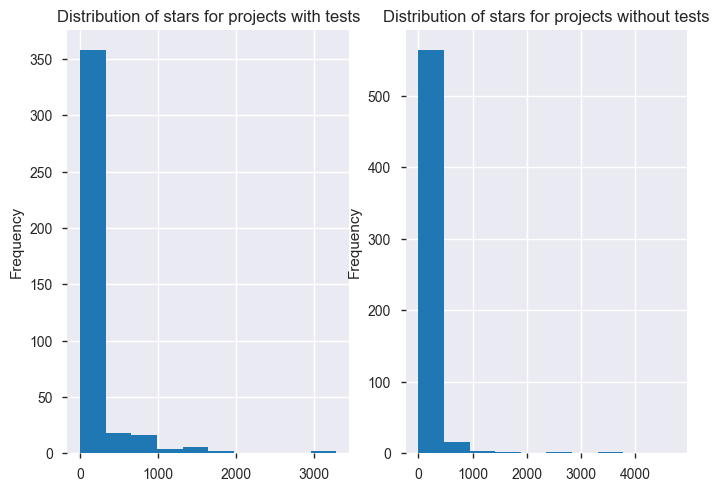

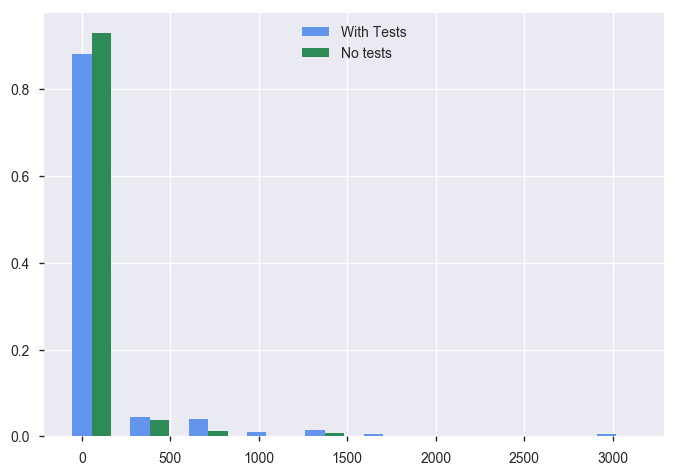

In [63]:
_,(ax1,ax2) = plt.subplots(1,2)
df_tmp[df_tmp['tests']]['stars'].plot.hist(ax=ax1)
ax1.set_title("Distribution of stars for projects with tests")
df_tmp[~df_tmp['tests']]['stars'].plot.hist(ax=ax2)
ax2.set_title("Distribution of stars for projects without tests")
plt.figure()

fig, ax = plt.subplots()

import numpy as np
a_heights, a_bins = np.histogram(df_tmp[df_tmp['tests']]['stars'])
b_heights, b_bins = np.histogram(df_tmp[~df_tmp['tests']]['stars'], bins=a_bins)

len_with_tests = len(df_tmp[df_tmp['tests']])
len_no_tests =len(df_tmp[~df_tmp['tests']]) 
a_heights = a_heights/len_with_tests
b_heights = b_heights/len_no_tests

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label="With Tests")
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='No tests')
ax.legend(loc='upper center', shadow=True)
pass

------
## Conjecture
----

This last histogram shows that most projects have a small number of stars. However, for projects with a bigger number of stars there are more projects with tests than without.

----

In [386]:
from statsmodels.graphics.boxplots import violinplot, beanplot

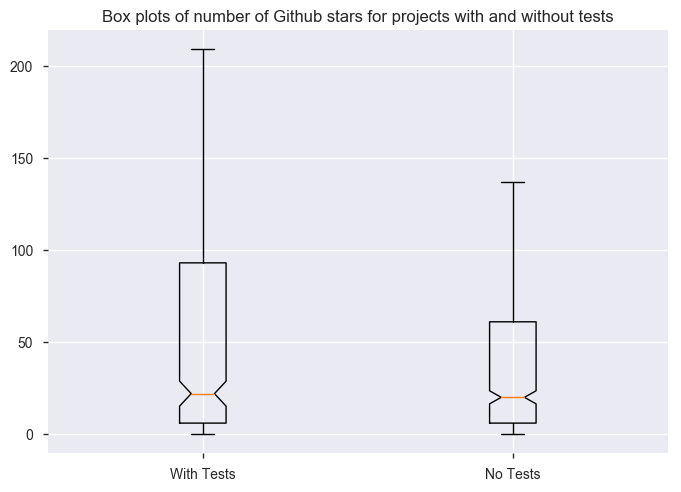

In [326]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['stars'].values,df_tmp[~df_tmp['tests']]['stars'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github stars for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

In [13]:
df_tmp = df[df['stars']<10000]
df_tmp[df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,406.000000,406.000000
mean,150.216749,54.514778
std,364.204219,144.958073
min,0.000000,0.000000
25%,6.000000,3.000000
50%,22.000000,9.000000
75%,93.000000,36.000000
max,3294.000000,1815.000000


In [14]:
df_tmp[~df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,593.000000,593.000000
mean,116.583474,42.158516
std,391.584433,122.692300
min,0.000000,0.000000
25%,6.000000,3.000000
50%,20.000000,9.000000
75%,61.000000,25.000000
max,4731.000000,1091.000000


### cobntributors

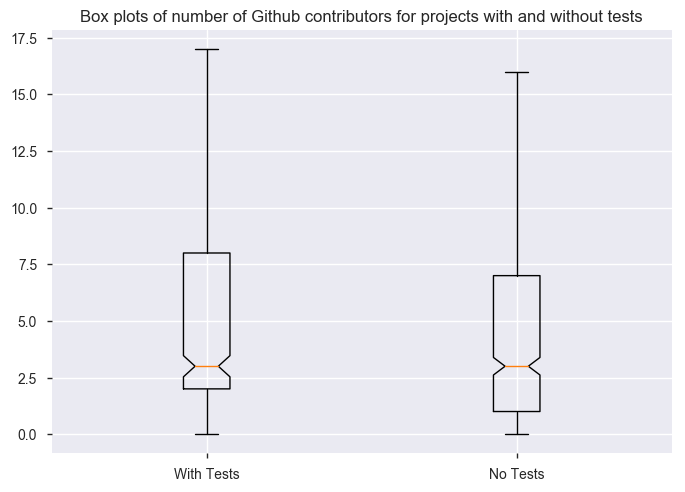

In [15]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['contributors'].values,df_tmp[~df_tmp['tests']]['contributors'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github contributors for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Activity/Contributions/Commits

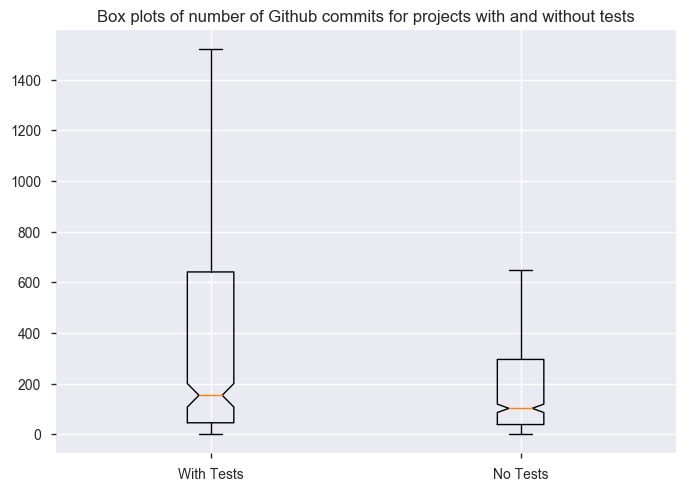

In [16]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['commits'].values,df_tmp[~df_tmp['tests']]['commits'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github commits for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Forks

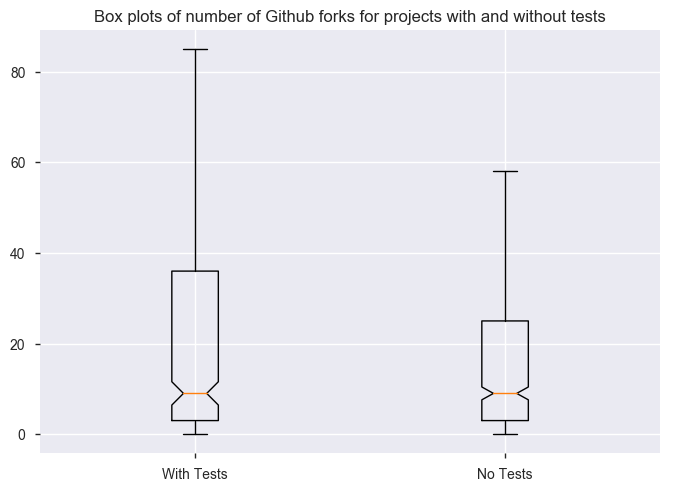

In [17]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['forks'].values,df_tmp[~df_tmp['tests']]['forks'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github forks for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

# Analysis of the impact of having UI tests in a project

## Stars vs UI Tests

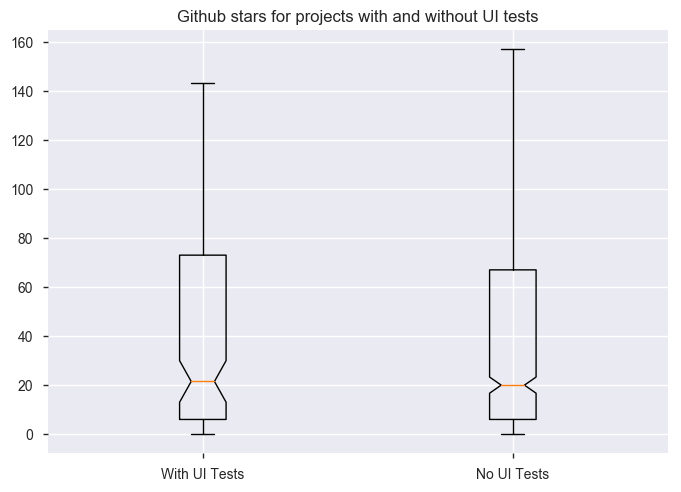

In [18]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['stars'].values,df_tmp[~df_tmp['ui_tests']]['stars'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Github stars for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

## Contributors vs UI Tests

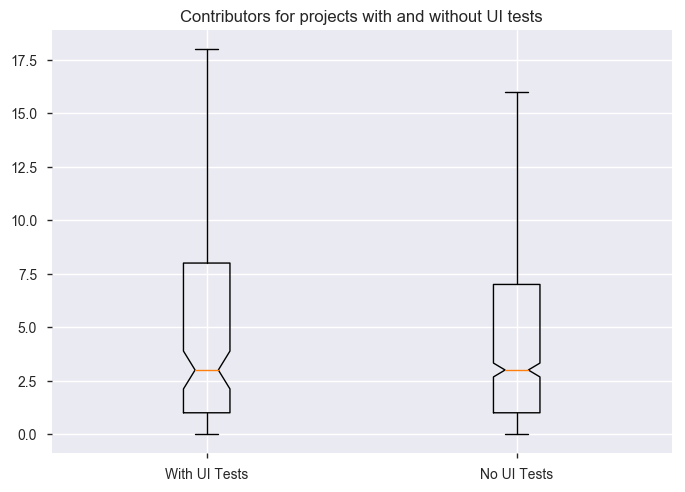

In [19]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['contributors'].values,df_tmp[~df_tmp['ui_tests']]['contributors'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Contributors for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

## Commits vs UI Tests


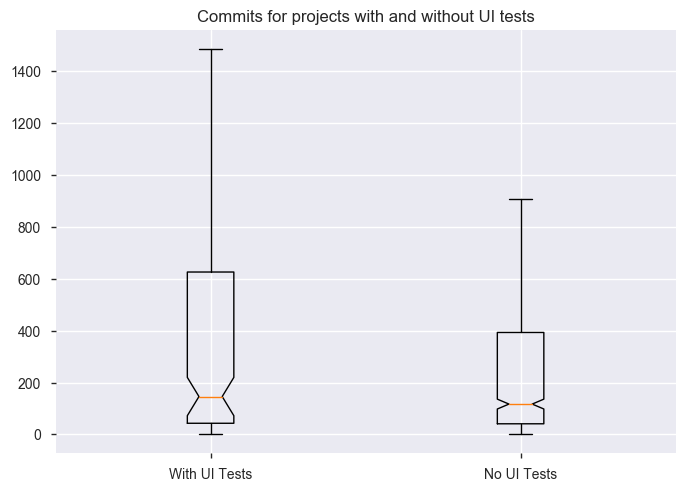

In [20]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['commits'].values,df_tmp[~df_tmp['ui_tests']]['commits'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Commits for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

# Analyze popular projects without tests

In [21]:
df_tmp[~df_tmp['tests']].sort_values('stars', ascending=False)

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
290,2017-05-20,https://github.com/samuelclay/NewsBlur,samuelclay,NewsBlur,com.newsblur,Reading,4731,66,11832,860,2009-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.797177,1346.0,"50,000 - 100,000",False,False,False
896,2015-11-17,https://github.com/dolphin-emu/dolphin,dolphin-emu,dolphin,org.dolphinemu.dolphinemu,Games,3662,294,25821,920,2013-07-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False
602,2016-11-02,https://github.com/naman14/Timber,naman14,Timber,naman14.timber,Multimedia,3391,26,467,1031,2015-06-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.313753,2894.0,"100,000 - 500,000",False,False,False
898,2015-11-15,https://github.com/hrydgard/ppsspp,hrydgard,ppsspp,org.ppsspp.ppsspp,Games,3085,207,22653,1091,2012-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.243116,853698.0,"10,000,000 - 50,000,000",False,False,False
517,2016-12-30,https://github.com/minetest/minetest,minetest,minetest,net.minetest.minetest,Games,2742,322,6957,822,2011-08-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.629015,2771.0,"100,000 - 500,000",False,False,False
15,2017-08-24,https://github.com/siacs/Conversations,siacs,Conversations,eu.siacs.conversations,Internet,2535,87,4311,834,2014-01-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.497098,1034.0,"10,000 - 50,000",False,False,False
393,2017-03-26,https://github.com/jonan/ForkHub,jonan,ForkHub,jp.forkhub,Development,2159,94,2831,166,2014-10-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.413389,1195.0,"50,000 - 100,000",False,False,False
165,2017-07-18,https://github.com/jackpal/Android-Terminal-Em...,jackpal,Android-Terminal-Emulator,jackpal.androidterm,Development,1624,65,1038,653,2010-09-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.395605,111217.0,"10,000,000 - 50,000,000",False,False,False
304,2017-05-15,https://github.com/redsolution/xabber-android,redsolution,xabber-android,com.xabber.androiddev,Internet,1484,14,2022,792,2013-01-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False
167,2017-07-18,https://github.com/arpitkh96/AmazeFileManager,arpitkh96,AmazeFileManager,com.amaze.filemanager,System,1416,71,2288,479,2014-07-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.339896,9447.0,"500,000 - 1,000,000",False,False,False


In [22]:
df[df['tests']]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
1,2017-08-28,https://github.com/subchannel13/EnchantedFortress,subchannel13,EnchantedFortress,hr.kravarscan.enchantedfortress,Games,12,2,73,3,2017-05-21,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
4,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.litecoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.481482,27.0,"1,000 - 5,000",True,True,False
5,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.ethereumwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.342105,76.0,"5,000 - 10,000",True,True,False
6,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.441176,918.0,"50,000 - 100,000",True,True,False
7,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoincashwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.666667,6.0,100 - 500,True,True,False
8,2017-08-28,https://github.com/gstraube/cythara,gstraube,cythara,com.github.cythara,Multimedia,6,1,135,0,2017-05-17,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
9,2017-08-28,https://github.com/ZeeRooo/MaterialFBook,ZeeRooo,MaterialFBook,me.zeeroooo.materialfb,Internet,63,5,82,28,2016-09-12,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
10,2017-08-28,https://github.com/PaulWoitaschek/Voice,PaulWoitaschek,Voice,de.ph1b.audiobook,Multimedia,788,17,3270,179,2014-08-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,4.372669,2949.0,"100,000 - 500,000",True,False,False
16,2017-08-24,https://github.com/rignaneseleo/SlimSocial-for...,rignaneseleo,SlimSocial-for-Facebook,it.rignanese.leo.slimfacebook,Internet,61,8,138,34,2015-11-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.262704,4408.0,"100,000 - 500,000",True,False,False
18,2017-08-24,https://github.com/gsantner/kimai-android,gsantner,kimai-android,de.live.gdev.timetracker,Internet,17,6,66,10,2014-02-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3.666667,24.0,"1,000 - 5,000",True,False,False


## Google Play Rating

In [25]:
df_with_google_data = df[~df["rating_count"].isnull()]

In [26]:
len(df_with_google_data)


638

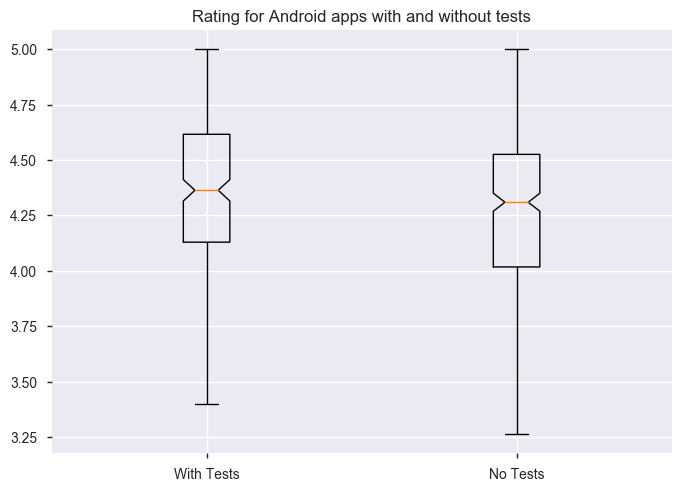

In [419]:
_,ax = plt.subplots()
violinplot
ax.boxplot(
    [df_tmp[df_tmp['tests']]['rating_value'].values,df_tmp[~df_tmp['tests']]['rating_value'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Rating for Android apps with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

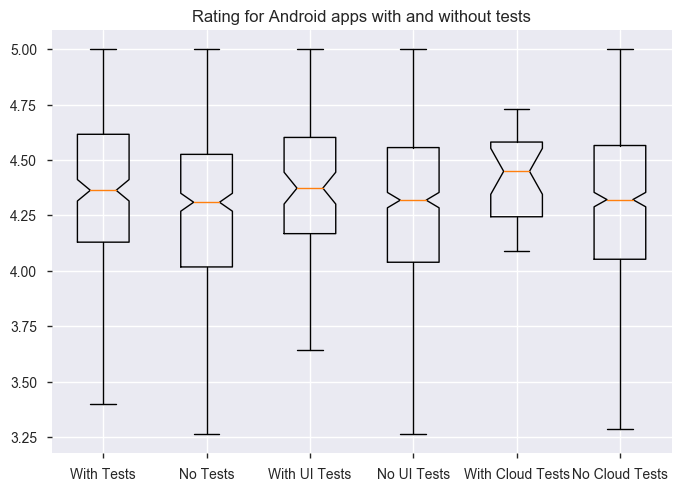

In [28]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_with_google_data[df_with_google_data['tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['tests']]['rating_value'].values,
        df_with_google_data[df_with_google_data['ui_tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['ui_tests']]['rating_value'].values,
        df_with_google_data[df_with_google_data['cloud_tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['cloud_tests']]['rating_value'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Rating for Android apps with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

In [29]:
from scipy.stats import mannwhitneyu

def compare_two_populations(a,b, label_a, label_b):
    print("{}: N={}, Avg={:.3f}, std={:.3f}".format(label_a, a.count(), a.mean(), a.std()))
    print("{}: N={}, Avg={:.3f}, std={:.3f}".format(label_b, b.count(), b.mean(), b.std()))
    print(mannwhitneyu(a, b))

In [30]:
df_with_tests = df_with_google_data[df_with_google_data['tests']]
df_without_tests = df_with_google_data[~df_with_google_data['tests']]


compare_two_populations(df_with_tests['rating_value'], df_without_tests['rating_value'],
                        "With tests", "Without tests")

With tests: N=250, Avg=4.295, std=0.480
Without tests: N=388, Avg=4.242, std=0.472
MannwhitneyuResult(statistic=43873.0, pvalue=0.020881059048314152)


In [44]:
a = df_with_tests[df_with_tests['rating_count']>6000]
b = df_without_tests[df_without_tests['rating_count']>6000]
compare_two_populations(a['rating_value'], b['rating_value'],
                        "With tests", "Without tests")

With tests: N=27, Avg=4.376, std=0.288
Without tests: N=41, Avg=4.277, std=0.246
MannwhitneyuResult(statistic=397.0, pvalue=0.02527291541281565)


In [148]:
x = range(0, 10000 , 100)
y_with_tests = tuple(df_with_tests[df_with_tests['rating_count']>i]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['rating_count']>i]['rating_value'].mean() for i in x)


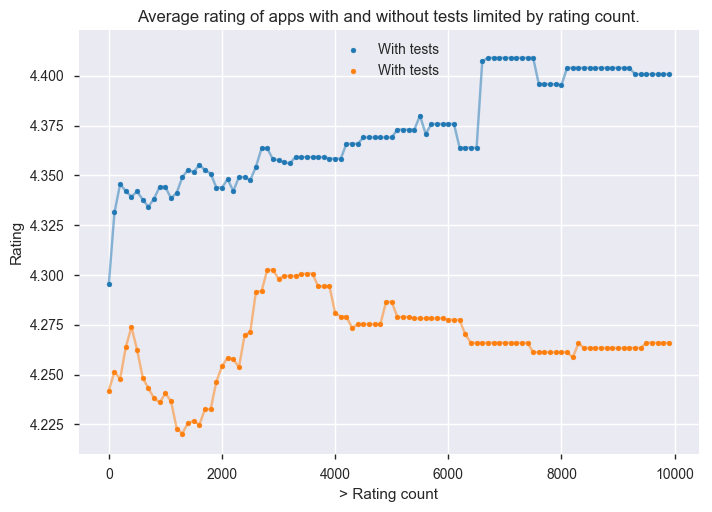

In [149]:
#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="With tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')

ax.set_title("Average rating of apps with and without tests limited by rating count.")
ax.set_ylabel("Rating")
ax.set_xlabel("> Rating count")
pass


Albeit the impact of the tests is small on rating. This impact grows as long ad the nmber of ratings in the project increases.

In [107]:
set(df_with_google_data['downloads'])
downloads_scale = [
 '1 - 5',
 '10 - 50',
 '50 - 100',
 '100 - 500',
 '500 - 1,000',
 '1,000 - 5,000',
 '5,000 - 10,000',
 '10,000 - 50,000',
 '50,000 - 100,000',
 '100,000 - 500,000',
 '500,000 - 1,000,000',
 '1,000,000 - 5,000,000',
 '5,000,000 - 10,000,000',
 '10,000,000 - 50,000,000',
 '50,000,000 - 100,000,000',
 '100,000,000 - 500,000,000',
 '500,000,000 - 1,000,000,000',
 '1,000,000,000 - 5,000,000,000',
 '5,000,000,000 - 10,000,000,000',
]

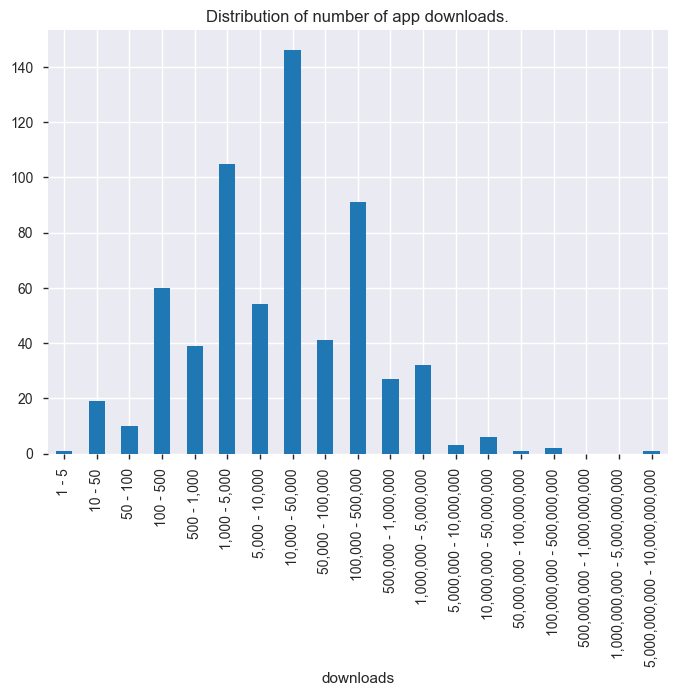

In [116]:
downloads_distribution = df_with_google_data.groupby('downloads')['downloads'].count()[downloads_scale]
ax = downloads_distribution.plot.bar()
ax.set_title("Distribution of number of app downloads.")

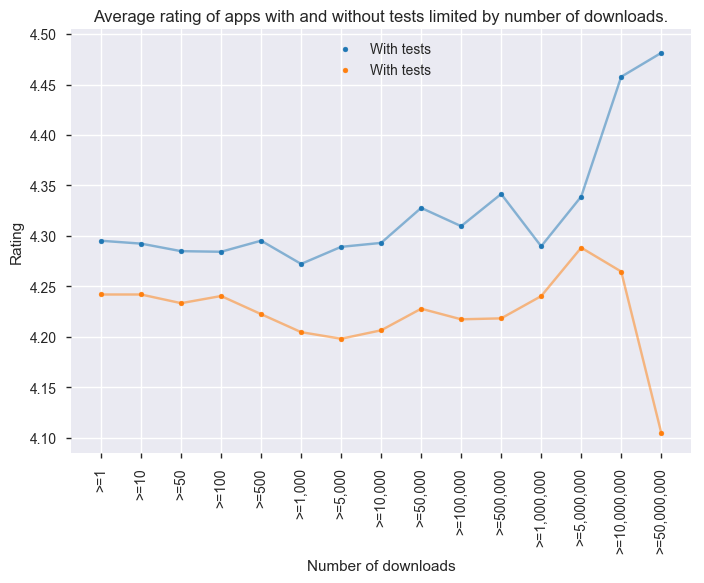

In [146]:
x = range(len(downloads_scale))
y_with_tests = tuple(df_with_tests[df_with_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
#y_without_tests = tuple(df_without_tests[df_without_tests['downloads'] in downloads_scale[i:]]['rating_value'].mean() for i in x)
#HACKS
remove_last = 4
y_with_tests = y_with_tests[:-remove_last]
y_without_tests = y_without_tests[:-remove_last]
x = x[:-remove_last]
#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="With tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')
ax.set_xticks(x)
x_labels = tuple(">="+name[:name.index(' -')] for name in downloads_scale)
ax.set_xticklabels(x_labels,rotation='vertical')
ax.set_title("Average rating of apps with and without tests limited by number of downloads.")
ax.set_ylabel("Rating")
ax.set_xlabel("Number of downloads")
pass


----
# Conjecture
----

Projects with tests are have significantly higher rating:
MannwhitneyuResult(statistic=43873.0, pvalue=0.020881059048314152).
The plot above shows the mean average ratings for apps with at least some number of downloads (given by xx axis).
It reveals that in apps with more than 10M users this difference is more evident.

Apps without tests are **more affected by corner cases** that are not being tested before deployment.

----

In [31]:
df_with_ui_tests = df_with_google_data[df_with_google_data['ui_tests']]
df_without_ui_tests = df_with_google_data[~df_with_google_data['ui_tests']]

compare_two_populations(df_with_ui_tests['rating_value'], df_without_ui_tests['rating_value'],
                        "With UI tests", "Without UI tests")

With UI tests: N=90, Avg=4.333, std=0.406
Without UI tests: N=548, Avg=4.251, std=0.486
MannwhitneyuResult(statistic=22282.0, pvalue=0.071158181266160789)


In [32]:
df_with_cloud_tests = df_with_google_data[df_with_google_data['cloud_tests']]
df_without_cloud_tests = df_with_google_data[~df_with_google_data['cloud_tests']]

compare_two_populations(df_with_cloud_tests['rating_value'], df_without_cloud_tests['rating_value'],
                        "With Cloud tests", "Without Cloud tests")

With Cloud tests: N=26, Avg=4.397, std=0.241
Without Cloud tests: N=612, Avg=4.257, std=0.483
MannwhitneyuResult(statistic=6546.5, pvalue=0.062902337466449104)


# Coveralls


In [167]:
df['coveralls']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25     10.84507
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
970         NaN
971         NaN
972         NaN
973         NaN
974         NaN
975         NaN
976         NaN
977         NaN
978         NaN
979         NaN
980         NaN
981         NaN
982         NaN
983         NaN
984         NaN
985         NaN
986         NaN
987         NaN
988         NaN
989         NaN
990         NaN
991         NaN
992         NaN
993         NaN
994         NaN
995         NaN
996         NaN
997         NaN
998         NaN
999         NaN
Name: coveralls, Length:

In [172]:
df['coveralls'].count()

9

In [179]:
df[~df['coveralls'].isnull()]['rating_value'].mean()

4.3583299432482034

In [183]:
df[df['coveralls'].isnull()]['rating_value'].mean()

4.2617749121223127

In [185]:
a = df[~df['coveralls'].isnull()]
b = df[df['coveralls'].isnull()]
compare_two_populations(a['rating_value'], b['rating_value'],
                        "With Coveralls", "Without coveralls")

With Coveralls: N=7, Avg=4.358, std=0.330
Without coveralls: N=631, Avg=4.262, std=0.477
MannwhitneyuResult(statistic=3905.0, pvalue=0.26033956100259847)
